In [1]:
import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets
from ipywidgets import interact

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

In [2]:
#reading the datastet
data = pd.read_csv('drug.csv')
print("The Shape of the Dataset :", data.shape)

The Shape of the Dataset : (161297, 7)


In [3]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,03-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
print("Number of Unique Drugs present in the Dataset :", data['drugName'].nunique())
print("Number of Unique Medical Conditions present in the Dataset :", data['condition'].nunique())

print("\nThe Time Period of Collecting the Data")
print("Starting Date :", data['date'].min())
print("Ending Date :", data['date'].max())

Number of Unique Drugs present in the Dataset : 3436
Number of Unique Medical Conditions present in the Dataset : 884

The Time Period of Collecting the Data
Starting Date : 01-Apr-08
Ending Date : 31-Oct-17


In [5]:
data[['rating','usefulCount']].describe() #std deviation measurement of uncertainity

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [6]:
print("Analysis on Useless Drugs")
print("----------------------------")
print("The Number of Drugs with No Useful Count :", data[data['usefulCount'] == 0].count()[0])


print("Number of Good Drugs with Lesser Useful Count :", data[(data['usefulCount'] == 0) &
                                                data['rating'] >= 8].count()[0])


print("Average Rating of Drugs with No Useful Count : {0:.2f}".format(data[data['usefulCount'] == 0]['rating'].mean()))

print("\nAnalysis on Useful Drugs")
print("----------------------------")
print("The Number of Drugs with Greater than 1000 Useful Counts :", data[data['usefulCount'] > 1000].count()[0])
print("Average Rating of Drugs with 1000+ Useful Counts :", data[data['usefulCount'] > 1000]['rating'].mean())
print("\nName and Condition of these Drugs: \n\n", 
    data[data['usefulCount'] > 1000][['drugName','condition']].reset_index(drop = True))

Analysis on Useless Drugs
----------------------------
The Number of Drugs with No Useful Count : 6318
Number of Good Drugs with Lesser Useful Count : 0
Average Rating of Drugs with No Useful Count : 5.80

Analysis on Useful Drugs
----------------------------
The Number of Drugs with Greater than 1000 Useful Counts : 4
Average Rating of Drugs with 1000+ Useful Counts : 10.0

Name and Condition of these Drugs: 

          drugName      condition
0          Mirena  Birth Control
1      Sertraline     Depression
2  Levonorgestrel  Birth Control
3          Zoloft     Depression


In [7]:
data[['drugName','condition','review']].describe(include = 'object') #statistical summary

,drugName,condition,review
count,161297,160398,161297
unique,3436,884,112329
top,Levonorgestrel,Birth Control,"""Good"""
freq,3657,28788,33


In [8]:
data.isnull().sum() #checking missing values

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [9]:
data = data.dropna() #dropping the missing valuyes
data.isnull().sum().sum() #updating the checking of missing values 

0

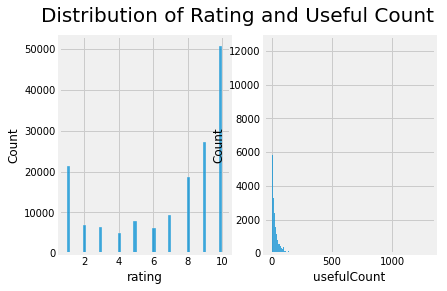

In [10]:
plt.rcParams['figure.figsize'] = (15, 5) #distribution of the rating and useful count

plt.subplot(1, 2, 1)
sns.histplot(data['rating'])

plt.subplot(1, 2, 2)
sns.histplot(data['usefulCount'])

plt.suptitle('Distribution of Rating and Useful Count \n ', fontsize = 20)
plt.show()

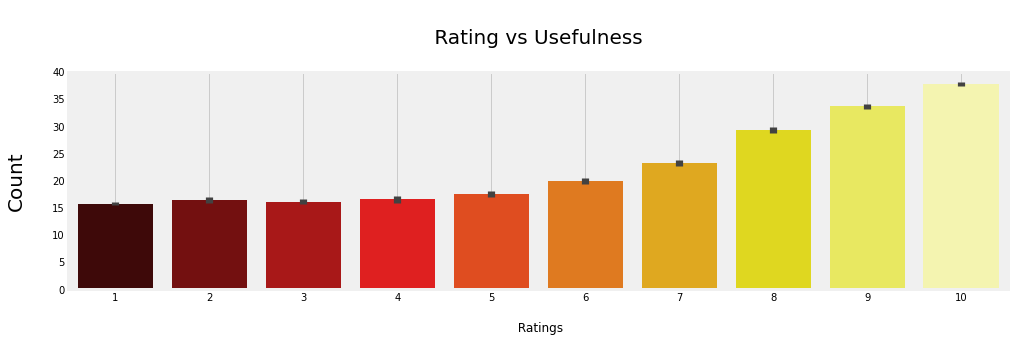

In [11]:
#impact of ratings
plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(x = data['rating'], y = data['usefulCount'], palette = 'hot')
plt.grid()
plt.xlabel('\n Ratings')
plt.ylabel('Count\n', fontsize = 20)
plt.title('\n Rating vs Usefulness \n', fontsize = 20)
plt.show() #shows positive linear relationship between the rating and the useful count column
            #no. of avg useful count is increasing as the rating is increasing

In [12]:
data['len']  = data['review'].apply(len) #understanding the impact of length of review, basically 
#determing whether longer reviews produce good/positve rating. So we create new column len and calculate 
#the length of reviews and insert inside the column

In [13]:
data[['rating','len']].groupby(['rating']).agg(['min','mean','max'])# checking impact of length of reviews on 
#ratings

len                   
       min        mean    max
rating                       
1        5  428.784505   3692
2        9  452.902893  10787
3        8  461.249961   5112
4        7  464.077912   3030
5        6  477.982661   2048
6        4  467.957150   2202
7        6  485.597765   3063
8        3  483.584163   4087
9        3  477.696117   6182
10       3  443.215923   6192

In [14]:
print("Length of Longest Review", data['len'].max()) #highest length review from above observation no.2
data['review'][data['len'] == data['len'].max()].iloc[0] 

Length of Longest Review 10787


'"Two and a half months ago I was prescribed Venlafaxine to help prevent chronic migraines.\r\nIt did help the migraines (reduced them by almost half), but with it came a host of side effects that were far worse than the problem I was trying to get rid of.\r\nHaving now come off of the stuff, I would not recommend anyone ever use Venlafaxine unless they suffer from extreme / suicidal depression. I mean extreme in the most emphatic sense of the word. \r\nBefore trying Venlafaxine, I was a writer. While on Venlafaxine, I could barely write or speak or communicate at all. More than that, I just didn&#039;t want to. Not normal for a usually outgoing extrovert.\r\nNow, I&#039;m beginning to write again - but my ability to speak and converse with others has deteriorated by about 95%. Writing these words is taking forever; keeping up in conversation with even one person is impossible, and I barely see the point of trying either. On Venlafaxine, words pretty much left me - my conversational vo

In [15]:
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation] #finding punctuations in the data using string library
    clean_str = ''.join(clean_list)
    return clean_str

data['review'] = data['review'].apply(punctuation_removal) #removing the punctuations as they have no
#sentimental meanings for a better textual analysis 

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')
stop.append("i'm") #adding a new word to the stop word list

stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 

def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words ]

data['review'] = data['review'].apply(stopwords_removal)

In [17]:
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

data['review'] = data['review'].apply(drop_numbers) #removing numbers from the reviews 

In [18]:
import textblob
from textblob import TextBlob

In [19]:
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
data['polarity'] = data['review'].apply(get_polarity)

In [20]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
data['subjectivity'] = data['review'].apply(get_subjectivity)

In [21]:
data[['len','polarity','subjectivity']].describe()

,len,polarity,subjectivity
count,160398.000000,160398.000000,160398.000000
mean,458.865491,0.065901,0.488802
std,242.237901,0.236475,0.185593
min,3.000000,-1.000000,0.000000
25%,262.000000,-0.050000,0.395114
50%,456.000000,0.058333,0.500000
75%,691.000000,0.187302,0.600000
max,10787.000000,1.000000,1.000000


In [22]:
data['polarity']

0         0.000000
1         0.148611
2         0.119805
3         0.262500
4         0.194444
            ...   
161292    0.261905
161293   -0.316667
161294   -0.223810
161295    0.201313
161296    0.104167
Name: polarity, Length: 160398, dtype: float64

In [23]:
data['polarity'].loc[50000]

-0.11384615384615383

In [24]:
min_rating = data['rating'].min() #calculating min and max rating
max_rating = data['rating'].max()

def scale_rating(rating):
    rating -= min_rating #deducting min rating from all ratings
    rating = rating/(max_rating -1) #dividing new update rating with (rating -1)
    rating *= 5     ##multiplying rating by 5 and can be treated as the threshold
    rating = int(round(rating,0))
    
    if(int(rating) == 0 or int(rating)==1 or int(rating)==2):
        return 0 #if score comes out to be 0,1,2 the eff score will be 0
    else:
        return 1 #otherwise it will be one
    
data['eff_score'] = data['rating'].apply(scale_rating)

In [25]:
data['eff_score']

0         1
1         1
2         0
3         1
4         1
         ..
161292    1
161293    0
161294    0
161295    1
161296    1
Name: eff_score, Length: 160398, dtype: int64

In [26]:
data['usefulness'] = (data['polarity']*data['subjectivity'])*100
(round(data['usefulness']))

0          0.0
1          6.0
2          5.0
3         16.0
4          8.0
          ... 
161292    12.0
161293   -29.0
161294    -8.0
161295    10.0
161296     6.0
Name: usefulness, Length: 160398, dtype: float64

In [27]:
data[['drugName','condition','usefulness']][data['usefulness'] > 
                            data['usefulness'].mean()].sort_values(by = 'usefulness', 
                                        ascending = False).head(10).reset_index(drop = True)

,drugName,condition,usefulness
0,Aprepitant,"Nausea/Vomiting, Chemotherapy Induced",100.0
1,Omeprazole,GERD,100.0
2,Triumeq,HIV Infection,100.0
3,Citalopram,Depression,100.0
4,Sildenafil,Erectile Dysfunction,100.0
5,Etonogestrel,Birth Control,100.0
6,Fluoxetine,Anxiety and Stress,100.0
7,Revlimid,14</span> users found this comment helpful.,100.0
8,Roxicet,Pain,100.0
9,Alprostadil,Erectile Dysfunction,100.0


In [28]:
@interact
def check(condition = list(data['condition'].value_counts().index)):
    return data[data['condition'] == condition]['eff_score'].value_counts() #analysing the medical conditions for usefulness
#finding out useful and useless drugs for each on condition

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

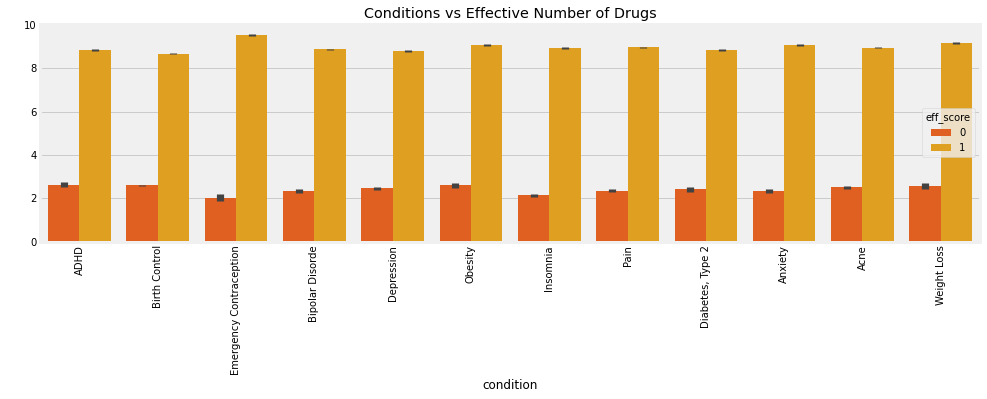

In [29]:
popular_conditions = ('Birth Control','Depression','Pain','Anxiety','Acne','Bipolar Disorde','Insomnia','Weight Loss',
                      'Obesity','ADHD', 'Diabetes, Type 2', 'Emergency Contraception','Migrane')
conditions = data.loc[data['condition'].isin(popular_conditions)]

sns.barplot( x=  conditions['condition'],  y =conditions['rating'], hue = data['eff_score'], 
     palette = 'autumn')
plt.title('Conditions vs Effective Number of Drugs')
plt.xticks(rotation = 90)
plt.ylabel(' ')
plt.show()

In [30]:
print("Number of Unique Conditions :", data['condition'].nunique())
data['condition'].value_counts().head(10)

Number of Unique Conditions : 884


Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

In [31]:
data[['drugName','usefulCount']][data['usefulCount'] >
                    data['usefulCount'].mean()].sort_values(by = 'usefulCount',
                                        ascending = False).head(10).reset_index(drop = True)

,drugName,usefulCount
0,Zoloft,1291
1,Sertraline,1291
2,Levonorgestrel,1247
3,Mirena,1247
4,Zoloft,949
5,Adipex-P,796
6,Phentermine,796
7,Celexa,771
8,Citalopram,771
9,Implanon,730


In [32]:
data = data.drop_duplicates()

In [33]:
@interact
def high_low_rate(condition = list(data['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    print(data[data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = False).head().reset_index(drop = True))
    print("\n\n Bottom 5 Drugs")
    print(data[data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = True).head().reset_index(drop = True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…